In [1]:
# !pip install emoji

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import emoji
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Dell/OneDrive/Desktop/book/Emoji_Dataset.csv')
data.head(-1)

,Id,Emoji,Polarity
0,1,:(,0
1,2,:D,1
2,3,:/,0
3,4,😊,1
4,5,😢,0
...,...,...,...
154,155,😽,1
155,156,😸,1
156,157,😺,1
157,158,😹,1


In [3]:
print("Dataset Information:")
data.info()
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        160 non-null    int64 
 1   Emoji     160 non-null    object
 2   Polarity  160 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.9+ KB

Missing Values:
Id          0
Emoji       0
Polarity    0
dtype: int64


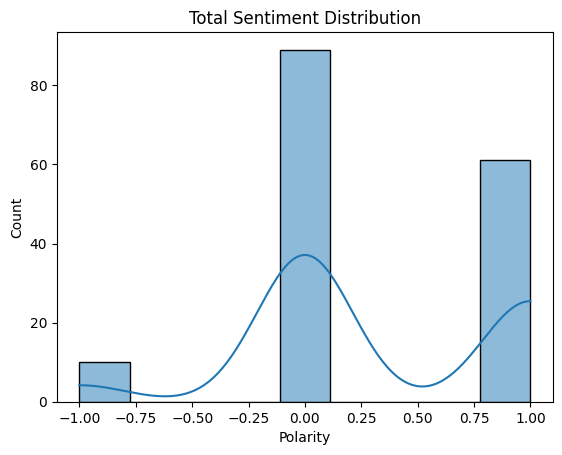

In [4]:
sns.histplot(data['Polarity'], kde=True).set_title("Total Sentiment Distribution")
plt.show()

In [5]:
data['Polarity'] = data['Polarity'].fillna(-1)

In [6]:
data['Emoji_Text'] = data['Emoji'].apply(lambda x: emoji.demojize(x) if isinstance(x, str) else '')
data.head(-1)

,Id,Emoji,Polarity,Emoji_Text
0,1,:(,0,:(
1,2,:D,1,:D
2,3,:/,0,:/
3,4,😊,1,:smiling_face_with_smiling_eyes:
4,5,😢,0,:crying_face:
...,...,...,...,...
154,155,😽,1,:kissing_cat:
155,156,😸,1,:grinning_cat_with_smiling_eyes:
156,157,😺,1,:grinning_cat:
157,158,😹,1,:cat_with_tears_of_joy:


In [7]:
X = data['Emoji_Text']
y = data['Polarity']

In [8]:
X, y

(0                                    :(
 1                                    :D
 2                                    :/
 3      :smiling_face_with_smiling_eyes:
 4                         :crying_face:
                      ...               
 155    :grinning_cat_with_smiling_eyes:
 156                      :grinning_cat:
 157             :cat_with_tears_of_joy:
 158       :smiling_cat_with_heart-eyes:
 159                 :face_with_monocle:
 Name: Emoji_Text, Length: 160, dtype: object,
 0      0
 1      1
 2      0
 3      1
 4      0
       ..
 155    1
 156    1
 157    1
 158    1
 159    0
 Name: Polarity, Length: 160, dtype: int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [11]:
classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)

MultinomialNB()

In [12]:
predictions = classifier.predict(X_test_counts)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.625


In [13]:
def classify_emoji(emoji_symbol):
    emoji_text = emoji.demojize(emoji_symbol)
    emoji_vector = vectorizer.transform([emoji_text])
    prediction = classifier.predict(emoji_vector)
    return prediction[0]

In [14]:
def print_sentiment_label(label):
    if label == 1:
        return "Positive"
    elif label == 0:
        return "Negative"
    elif label == -1:
        return "Neutral"
    else:
        return "Unknown"

In [15]:
print(print_sentiment_label(classify_emoji("😊")))
print(print_sentiment_label(classify_emoji("😬")))
print(print_sentiment_label(classify_emoji("😓")))
print(print_sentiment_label(classify_emoji("😍")))

Positive
Negative
Negative
Positive
